In [1]:

import os
import numpy as np
import glob
import keras
from PIL import Image
from scipy.misc import *

Using TensorFlow backend.


In [2]:
#Loading our data
x_train=[]

for i in glob.glob('inputs/*.jpg'):
    img=imread(i,flatten=True)
    img=img.astype('float32')
    x_train.append(img)

x_test=[]

for i in glob.glob('targets/*.jpg'):
    img=imread(i,flatten=True)
    img=img.astype('float32')
    x_test.append(img)

In [3]:
train=np.array(x_train)
labels=np.array(x_test)

In [4]:
print train.shape
print labels.shape

(2927, 28, 28)
(2927, 28, 28)


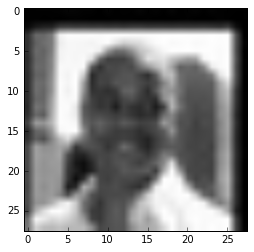

In [5]:
#A sample image in the dataset
import matplotlib.pyplot as plt
plt.imshow(train[0],cmap='gray')
plt.show()

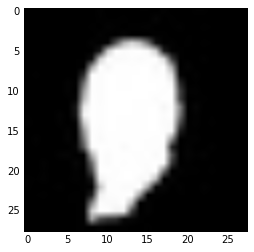

In [6]:
#The segmented image for the above picture
plt.imshow(labels[0],cmap='gray')
plt.show()

In [7]:
train/=255
labels/=255

In [8]:
train_labels=labels.reshape(labels.shape[0],784)
train_set=train.reshape(train.shape[0],784)

In [9]:
print train_labels.shape
print train_set.shape

(2927, 784)
(2927, 784)


In [10]:
#Splitting in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2, random_state=42)

In [11]:
#Building our model
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Dense(392,activation='relu',input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(392,activation='relu'))
model.add(Dense(784,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.1)

Train on 2106 samples, validate on 235 samples
Epoch 1/100
2106/2106 [==============================] - 1s - loss: 0.4460 - acc: 0.5131 - val_loss: 0.3012 - val_acc: 0.5610
Epoch 2/100
2106/2106 [==============================] - 1s - loss: 0.2887 - acc: 0.5656 - val_loss: 0.2779 - val_acc: 0.5702
Epoch 3/100
2106/2106 [==============================] - 1s - loss: 0.2779 - acc: 0.5680 - val_loss: 0.2697 - val_acc: 0.5698
Epoch 4/100
2106/2106 [==============================] - 1s - loss: 0.2731 - acc: 0.5681 - val_loss: 0.2681 - val_acc: 0.5704
Epoch 5/100
2106/2106 [==============================] - 1s - loss: 0.2715 - acc: 0.5681 - val_loss: 0.2668 - val_acc: 0.5703
Epoch 6/100
2106/2106 [==============================] - 0s - loss: 0.2703 - acc: 0.5681 - val_loss: 0.2644 - val_acc: 0.5706
Epoch 7/100
2106/2106 [==============================] - 1s - loss: 0.2687 - acc: 0.5682 - val_loss: 0.2622 - val_acc: 0.5707
Epoch 8/100
2106/2106 [==============================] - 0s - loss: 0.2

2106/2106 [==============================] - 1s - loss: 0.1435 - acc: 0.5925 - val_loss: 0.2314 - val_acc: 0.5796
Epoch 66/100
2106/2106 [==============================] - 1s - loss: 0.1442 - acc: 0.5924 - val_loss: 0.2350 - val_acc: 0.5773
Epoch 67/100
2106/2106 [==============================] - 1s - loss: 0.1423 - acc: 0.5927 - val_loss: 0.2329 - val_acc: 0.5788
Epoch 68/100
2106/2106 [==============================] - 1s - loss: 0.1412 - acc: 0.5929 - val_loss: 0.2265 - val_acc: 0.5794
Epoch 69/100
2106/2106 [==============================] - 1s - loss: 0.1389 - acc: 0.5933 - val_loss: 0.2313 - val_acc: 0.5790
Epoch 70/100
2106/2106 [==============================] - 1s - loss: 0.1383 - acc: 0.5935 - val_loss: 0.2400 - val_acc: 0.5773
Epoch 71/100
2106/2106 [==============================] - 1s - loss: 0.1396 - acc: 0.5933 - val_loss: 0.2330 - val_acc: 0.5796
Epoch 72/100
2106/2106 [==============================] - 1s - loss: 0.1380 - acc: 0.5935 - val_loss: 0.2406 - val_acc: 0.57

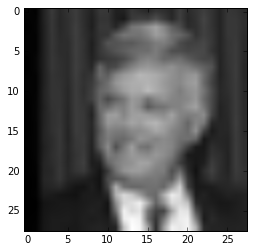

In [13]:
#A test image
sample=X_test[0]
plt.imshow(sample.reshape(28,28),cmap='gray')
plt.show()

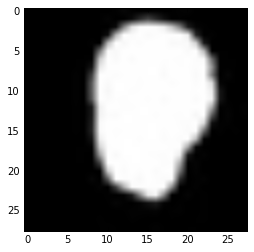

In [14]:
#The real segmented image
sample_lable=y_test[0]
plt.imshow(sample_lable.reshape(28,28),cmap='gray')
plt.show()

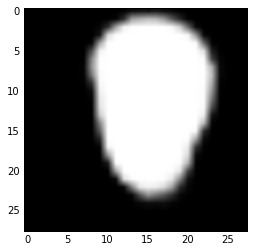

In [15]:
#The predicted segmentation of the image
plt.imshow(model.predict(y_test[0].reshape(1,784)).reshape(28,28),cmap='gray')
plt.show()